In [89]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
notebook_dir = os.getcwd()  
project_root = os.path.abspath(os.path.join(notebook_dir, '../'))  
sys.path.append(project_root)

# Import các hàm từ json_handle
from ml.preprocess.utils.json_handle import (
    merge_data_with_paths,
    read_json,
    merge_json_files,
    write_json
)

In [90]:
path = "../data/interim/batdongsancomvn/nharieng/interim_merged_nharieng.json"
data = read_json(path)
data = [entry for entry in data if entry.get("price") != "deal"]
df = pd.DataFrame(data)
df = df.query("price != 'deal'")


Số lượng giá trị NaN sau khi chuyển đổi:
frontage       0
area           0
price         45
longitude     13
latitude      13
bedroom      418
toilet       690
legal        157
floor        114
furniture     74
dtype: int64


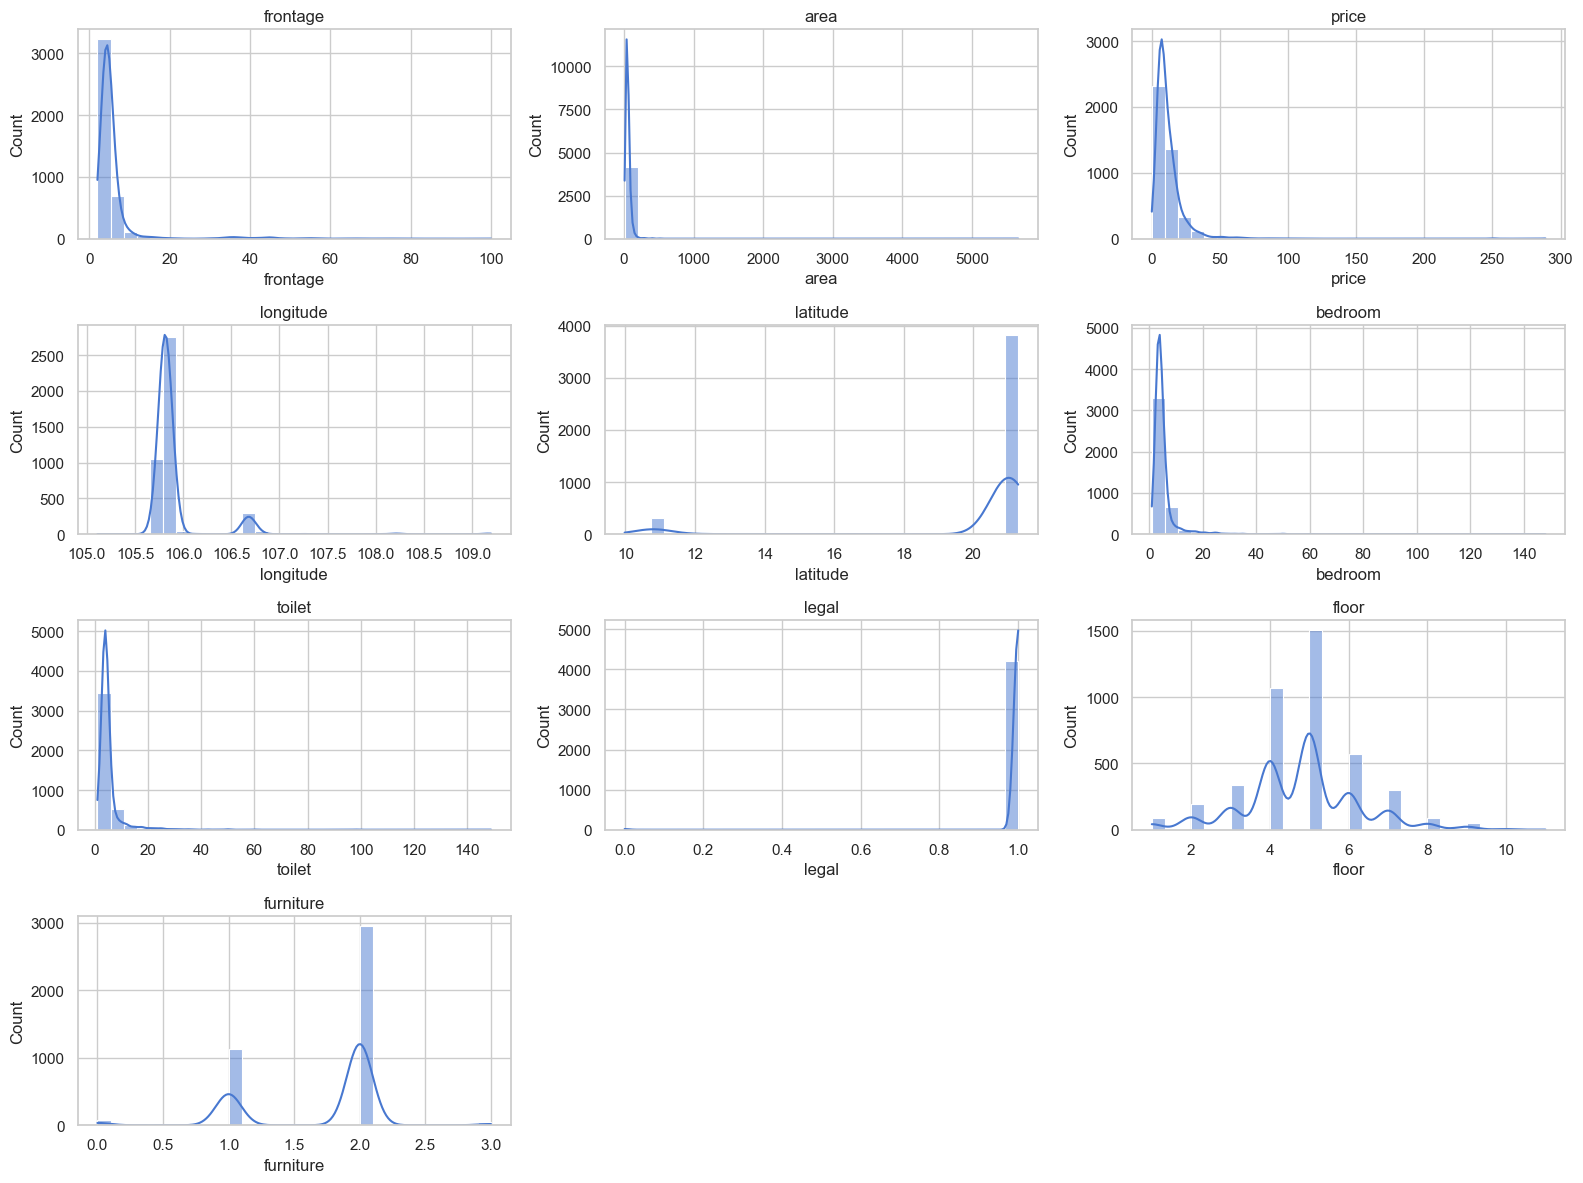

In [91]:
# Vẽ histogram và KDE cho các biến
variables = ["frontage","area","price","longitude","latitude","bedroom","toilet","legal","floor","furniture"]
df_clean = df[variables].copy()
df_clean = df_clean[df_clean['frontage'] <= 100]


for var in variables:
    non_numeric = df_clean[~df_clean[var].apply(lambda x: isinstance(x, (int, float)))][var]
    if not non_numeric.empty:
        print(f"\nGiá trị không phải số trong cột '{var}':")
        print(non_numeric.unique())

# Chuyển đổi các cột thành số, các giá trị không thể chuyển đổi thành NaN
for var in variables:
    df_clean[var] = pd.to_numeric(df_clean[var], errors='coerce')

# Kiểm tra số lượng NaN sau khi chuyển đổi
print("\nSố lượng giá trị NaN sau khi chuyển đổi:")
print(df_clean[variables].isnull().sum())

# Cách 1: Loại bỏ các dòng chứa NaN
df_clean = df_clean.dropna(subset=variables)
df_clean = df_clean[df_clean['price'] <= 300]
df_clean = df_clean[df_clean['area'] <= 10000]

# Vẽ histogram và KDE cho các biến đã làm sạch
plt.figure(figsize=(16, 12))
for i, var in enumerate(variables, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df_clean[var], kde=True, bins=30)
    plt.title(f'{var}')
plt.tight_layout()
plt.show()


Số lượng giá trị NaN sau khi chuyển đổi:
frontage     2095
area            0
price          55
longitude      17
latitude       17
bedroom       763
toilet       1286
legal         256
floor         337
furniture     126
dtype: int64


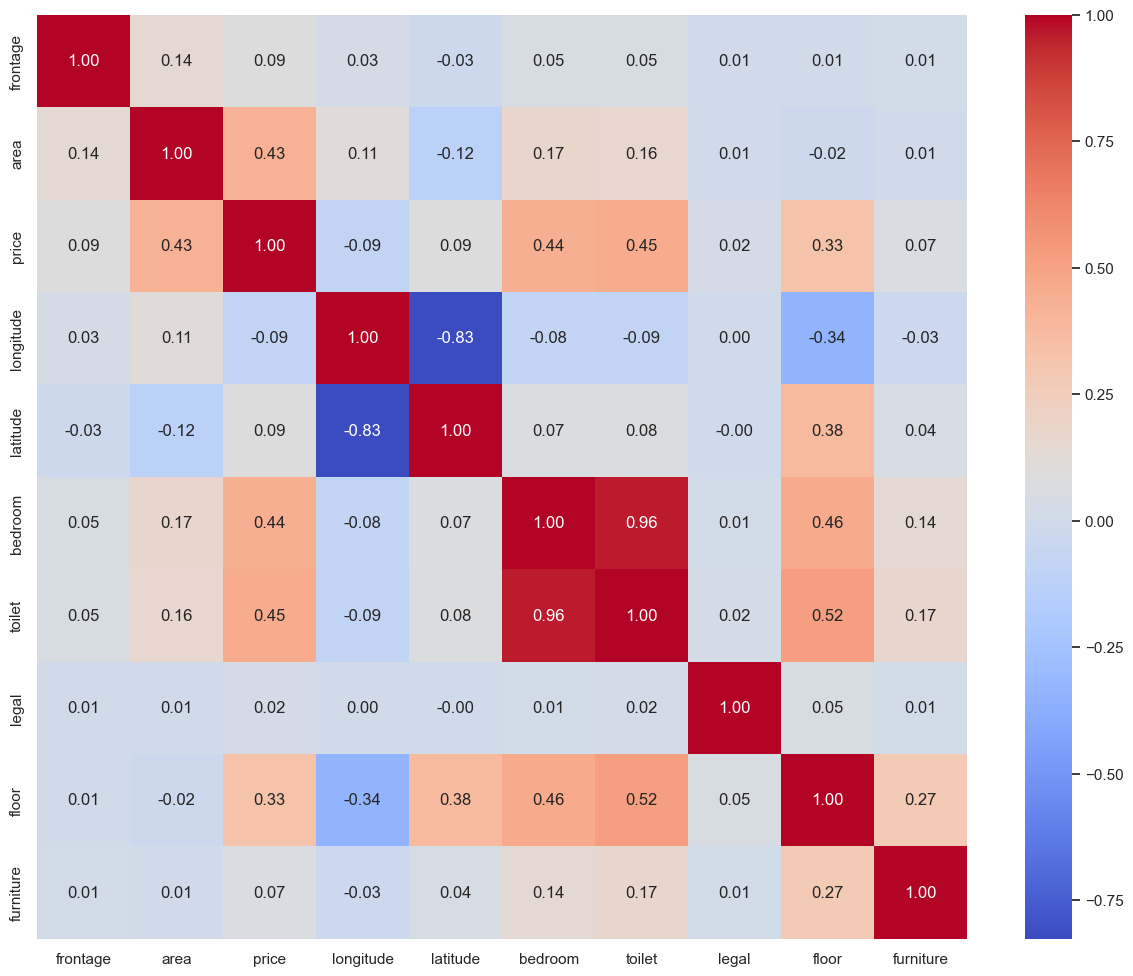

In [92]:
# Tính ma trận tương quan
variables = ["frontage","area","price","longitude","latitude","bedroom","toilet","legal","floor","furniture"]
df_clean = df[variables].copy()
# Chuyển đổi các cột thành số, các giá trị không thể chuyển đổi thành NaN
for var in variables:
    df_clean[var] = pd.to_numeric(df_clean[var], errors='coerce')

# Kiểm tra số lượng NaN sau khi chuyển đổi
print("\nSố lượng giá trị NaN sau khi chuyển đổi:")
print(df_clean[variables].isnull().sum())

# Cách 1: Loại bỏ các dòng chứa NaN
df_clean = df_clean.dropna(subset=variables)
df_clean = df_clean[df_clean['price'] <= 300]
df_clean = df_clean[df_clean['area'] <= 10000]
correlation_matrix = df_clean.corr()

# Vẽ heatmap của ma trận tương quan
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Ma Trận Tương Quan giữa các Biến')
plt.show()



/var/folders/w5/txck4bg523d_v2l_9zf_wrzw0000gn/T/ipykernel_84624/1784480004.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/w5/txck4bg523d_v2l_9zf_wrzw0000gn/T/ipykernel_84624/1784480004.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/w5/txck4bg523d_v2l_9zf_wrzw0000gn/T/ipykernel_84624/1784480004.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/w5/txck4bg523d_v2l_9zf_wrzw0000gn/T/ipykernel_84624/1784480004.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

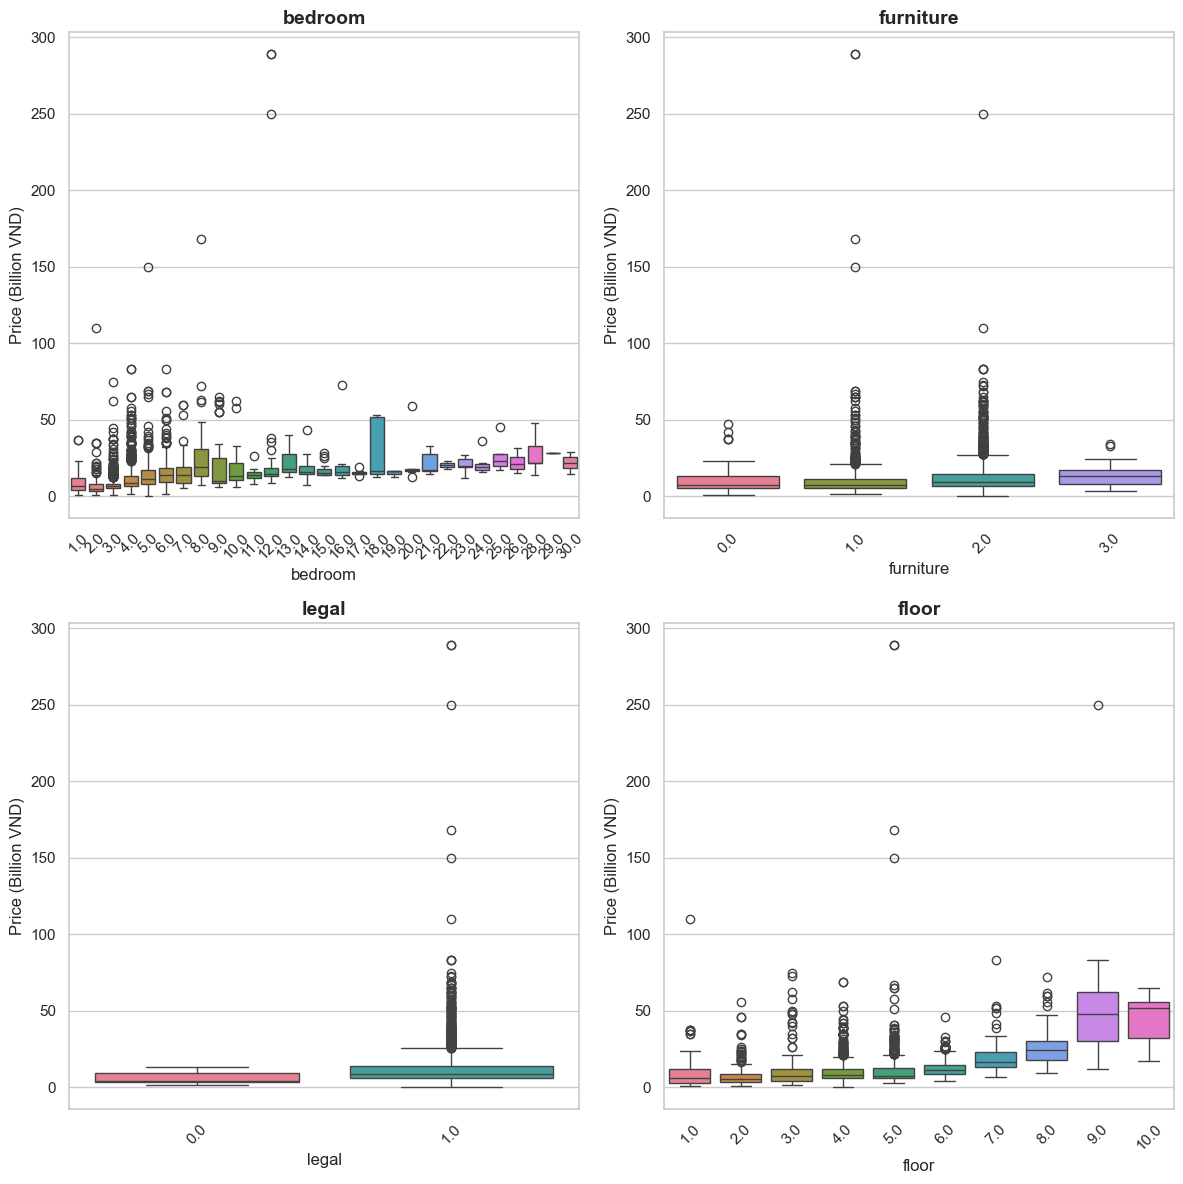

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1. Chuyển 'price' về kiểu số, loại bỏ các giá trị không hợp lệ
df_clean['price'] = pd.to_numeric(df_clean['price'], errors='coerce')

# 2. Lọc các hàng có giá trị price <= 300
df_clean = df_clean[df_clean['price'] <= 300]
df_clean = df_clean[df_clean['bedroom'] <= 30]

# 3. Loại bỏ các hàng có giá trị NaN trong 'price' và các cột phân loại
categorical_features = ['bedroom', 'furniture', 'legal', 'floor']
df_clean = df_clean.dropna(subset=['price'] + categorical_features)

# 4. Loại bỏ các hàng có giá trị không hợp lệ trong cột phân loại
for cat_feature in categorical_features:
    df_clean = df_clean[df_clean[cat_feature] != 'deal']

# 5. Vẽ BoxPlot cho từng cột phân loại trên lưới 2 hàng
n_features = len(categorical_features)
ncols = 2  # Số cột trên mỗi hàng
nrows = (n_features + 1) // ncols  # Tính số hàng cần thiết

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 6 * nrows))  # Kích thước lưới

# Chuyển axes thành mảng 1 chiều để dễ duyệt qua
axes = axes.flatten()

# Lặp qua từng cột phân loại và vẽ BoxPlot trên từng trục
for i, cat_feature in enumerate(categorical_features):
    sns.boxplot(
        x=cat_feature, 
        y='price', 
        data=df_clean, 
        ax=axes[i],
        palette=sns.color_palette("husl", len(df_clean[cat_feature].unique()))
    )
    axes[i].set_title(f'{cat_feature}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel(cat_feature, fontsize=12)
    axes[i].set_ylabel('Price (Billion VND)', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)  # Xoay nhãn trục x

# Xóa các ô trống nếu số cột không chia hết cho ncols
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Tự động căn chỉnh khoảng cách
plt.tight_layout()
plt.show()

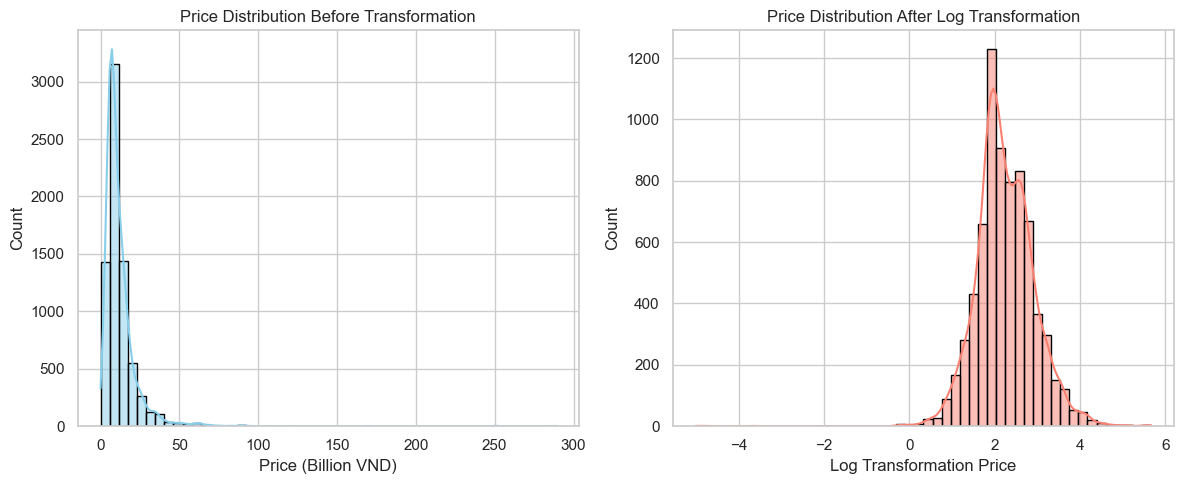

In [94]:
# Chuyển cột 'price' sang kiểu số, các giá trị không phải số sẽ trở thành NaN
data = [entry for entry in data if entry.get("price") != "deal"]

# Tạo DataFrame từ data
df_clean = pd.DataFrame(data)

# Chuyển cột price sang số và loại bỏ NaN
df_clean['price'] = pd.to_numeric(df_clean['price'], errors='coerce')
df_clean = df_clean.dropna(subset=['price'])  # Loại bỏ NaN
df_clean = df_clean[df_clean['price'] <= 300]


# Loại bỏ giá trị price <= 0 (vì log không xác định cho x <= 0)
df_clean = df_clean[df_clean['price'] > 0]

# Thiết lập phong cách và bảng màu
sns.set(style="whitegrid", palette="muted")

# Biểu đồ trước và sau khi biến đổi logarit
plt.figure(figsize=(12, 5))

# Biểu đồ 1: Phân phối giá gốc
plt.subplot(1, 2, 1)
sns.histplot(df_clean['price'], kde=True, color="skyblue", bins=50, edgecolor="black", linewidth=1)
plt.title('Price Distribution Before Transformation')
plt.xlabel('Price (Billion VND)')
plt.ylabel('Count')

# Biểu đồ 2: Phân phối giá logarit
df_clean['log_price'] = np.log(df_clean['price'])  # Logarithm transformation

plt.subplot(1, 2, 2)
sns.histplot(df_clean['log_price'], kde=True, color="salmon", bins=50, edgecolor="black", linewidth=1)
plt.title('Price Distribution After Log Transformation')
plt.xlabel('Log Transformation Price')
plt.ylabel('Count')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

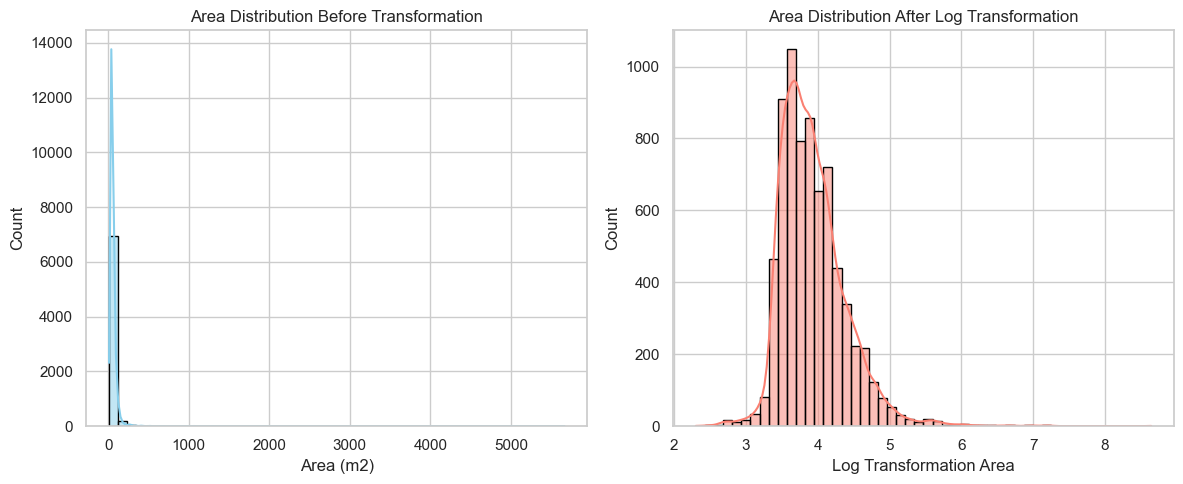

In [95]:
# Chuyển cột 'price' sang kiểu số, các giá trị không phải số sẽ trở thành NaN
data = [entry for entry in data if entry.get("price") != "deal"]

# Tạo DataFrame từ data
df_clean = pd.DataFrame(data)

# Chuyển cột price sang số và loại bỏ NaN
df_clean['price'] = pd.to_numeric(df_clean['price'], errors='coerce')
df_clean = df_clean.dropna(subset=['price'])  # Loại bỏ NaN
df_clean = df_clean[df_clean['price'] <= 300]


# Loại bỏ giá trị price <= 0 (vì log không xác định cho x <= 0)
df_clean = df_clean[df_clean['price'] > 0]

# Thiết lập phong cách và bảng màu
sns.set(style="whitegrid", palette="muted")

# Biểu đồ trước và sau khi biến đổi logarit
plt.figure(figsize=(12, 5))

# Biểu đồ 1: Phân phối giá gốc
plt.subplot(1, 2, 1)
sns.histplot(df_clean['area'], kde=True, color="skyblue", bins=50, edgecolor="black", linewidth=1)
plt.title('Area Distribution Before Transformation')
plt.xlabel('Area (m2)')
plt.ylabel('Count')

# Biểu đồ 2: Phân phối giá logarit
df_clean['log_area'] = np.log(df_clean['area'])  # Logarithm transformation

plt.subplot(1, 2, 2)
sns.histplot(df_clean['log_area'], kde=True, color="salmon", bins=50, edgecolor="black", linewidth=1)
plt.title('Area Distribution After Log Transformation')
plt.xlabel('Log Transformation Area')
plt.ylabel('Count')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

In [96]:
import pandas as pd

# Đọc dữ liệu JSON
path = "../data/interim/batdongsancomvn/nharieng/interim_merged_nharieng.json"
data = read_json(path)

# Tạo DataFrame từ dữ liệu
df = pd.DataFrame(data)

# Thay thế các giá trị "deal" trong cột 'price' thành None (NaN)
df['price'] = df['price'].apply(lambda x: None if x == "deal" else x)


In [97]:
# Tính tỷ lệ giá trị NaN cho từng cột
nan_ratios = df.isna().mean()  # Tính tỷ lệ NaN (số NaN / tổng số dòng)

# Chuyển kết quả thành DataFrame để hiển thị đẹp hơn
nan_ratios_df = pd.DataFrame({
    "Feature": nan_ratios.index,
    "NaN Ratio": nan_ratios.values
})

# In ra kết quả
print("Tỷ lệ giá trị NaN của tất cả các thuộc tính:")
print(nan_ratios_df.to_string(index=False))

Tỷ lệ giá trị NaN của tất cả các thuộc tính:
  Feature  NaN Ratio
     area   0.000000
    price   0.056093
longitude   0.002223
 latitude   0.002223
    legal   0.034780
furniture   0.018567
 frontage   0.289095
    floor   0.046417
  bedroom   0.105518
   toilet   0.176124


In [98]:

#   Feature  NaN Ratio
#      area   0.000000
#     price   0.056093
# longitude   0.002223
#  latitude   0.002223
#     legal   0.034780
# furniture   0.018567
#  frontage   0.289095
#     floor   0.046417
#   bedroom   0.105518
#    toilet   0.176124